In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('testingstuffisworking.csv', names = ['t','winner'])
drop = df.loc[df['t'] == 'game'].index
df = df.drop(drop)
df = df.drop('t', axis = 1)
new_i = np.arange(df.shape[0])
df = df.set_index(new_i)

In [3]:
df2 = pd.read_csv('testingstuffisworking2.csv', names = ['t','winner'])
drop = df2.loc[df2['t'] == 'game'].index
df2 = df2.drop(drop)
df2 = df2.drop('t', axis = 1)
new_i = np.arange(df2.shape[0])
df2 = df2.set_index(new_i)

In [4]:
df3 = pd.read_csv('tryinganotherreward-1.csv', names = ['t','winner'])
drop = df3.loc[df3['t'] == 'game'].index
df3 = df3.drop(drop)
df3 = df3.drop('t', axis = 1)
new_i = np.arange(df3.shape[0])
df3 = df3.set_index(new_i)

In [5]:
df4 = pd.read_csv('tstuff.csv', names = ['t','winner'])
drop = df4.loc[df4['t'] == 'game'].index
df4 = df4.drop(drop)
df4 = df4.drop('t', axis = 1)
new_i = np.arange(df4.shape[0])
df4 = df4.set_index(new_i)

In [6]:
def count_steps(df):
    first_1000 = df.iloc[:1000]
    f1000_wins = first_1000.loc[first_1000['winner'] == 1].sum()

    second_1000 = df.iloc[1000:2000]
    s1000_wins = second_1000.loc[second_1000['winner'] == 1].sum()

    third_1000 = df.iloc[2000:3000]
    t1000_wins = third_1000.loc[third_1000['winner'] == 1].sum()

    fourth_1000 = df.iloc[3000:4000]
    fou1000_wins = fourth_1000.loc[fourth_1000['winner'] == 1].sum()

    fifth_1000 = df.iloc[4000:5000]
    fif1000_wins = fifth_1000.loc[fifth_1000['winner'] == 1].sum()

    wins = np.array([f1000_wins,s1000_wins, t1000_wins,fou1000_wins,fif1000_wins])
    headings = np.array(['first 1000 games', 'next 1000 games' , 'next 1000 games' , 'next 1000 games' , 'next 1000 games'])

    first_1000 = df.iloc[:1000]
    f1000_wins = first_1000.loc[first_1000['winner'] == 0].count()

    second_1000 = df.iloc[1000:2000]
    s1000_wins = second_1000.loc[second_1000['winner'] == 0].count()

    third_1000 = df.iloc[2000:3000]
    t1000_wins = third_1000.loc[third_1000['winner'] == 0].count()

    fourth_1000 = df.iloc[3000:4000]
    fou1000_wins = fourth_1000.loc[fourth_1000['winner'] == 0].count()

    fifth_1000 = df.iloc[4000:5000]
    fif1000_wins = fifth_1000.loc[fifth_1000['winner'] == 0].count()

    wins2 = np.array([f1000_wins,s1000_wins, t1000_wins,fou1000_wins,fif1000_wins])


    winnings = pd.DataFrame()
    winnings['Heading'] = headings 
    winnings['my wins '] = wins
    winnings['opponent wins '] = wins2

    return winnings

In [7]:
df_wins = count_steps(df)
df2_wins = count_steps(df2)
df3_wins = count_steps(df3)
df4_wins = count_steps(df4)

display(df_wins)
display(df2_wins)
display(df3_wins)
display(df4_wins)

Heading  my wins   opponent wins 
0  first 1000 games       183              34
1   next 1000 games       107              36
2   next 1000 games       123              29
3   next 1000 games       116              34
4   next 1000 games       106              44

Heading  my wins   opponent wins 
0  first 1000 games       180              53
1   next 1000 games       147              66
2   next 1000 games       151              55
3   next 1000 games       148              42
4   next 1000 games       135              50

Heading  my wins   opponent wins 
0  first 1000 games       321             346
1   next 1000 games       313             280
2   next 1000 games       306             232
3   next 1000 games       336             239
4   next 1000 games       315             240

Heading  my wins   opponent wins 
0  first 1000 games       261             180
1   next 1000 games       293             207
2   next 1000 games       266             183
3   next 1000 games       303             181
4   next 1000 games       307             166

In [8]:
me_df = df_wins['my wins ']
me_df2 = df2_wins['my wins ']

avg_me = (me_df+me_df2)/2

df2_wins['avg_me'] = avg_me

opp_df = df_wins['opponent wins ']
opp_df2 = df2_wins['opponent wins ']

avg_opp = (opp_df+opp_df2)/2

df2_wins['avg_opp'] = avg_opp

df2_wins

Heading  my wins   opponent wins   avg_me  avg_opp
0  first 1000 games       180              53   181.5     43.5
1   next 1000 games       147              66   127.0     51.0
2   next 1000 games       151              55   137.0     42.0
3   next 1000 games       148              42   132.0     38.0
4   next 1000 games       135              50   120.5     47.0

In [9]:
def accum_me(df):
    cumsum = 0
    all_sum = []

    for i in range(df.shape[0]):
        # print(df['winner'][i])
        if df['winner'][i] == 1:
            cumsum +=1
        all_sum.append(cumsum)

    df['accumulated_sum'] = all_sum
    return df

def accum_opp(df):
    cumsum = 0
    all_sum = []

    for i in range(df.shape[0]):
        # print(df['winner'][i])
        if df['winner'][i] == 0:
            cumsum +=1
        all_sum.append(cumsum)

    df['accumulated_sum_opp'] = all_sum
    return df

In [10]:
df_accum = accum_me(df)
df2_accum = accum_me(df2)
df3_accum = accum_me(df3)
df4_accum = accum_me(df4)

df_accum = accum_opp(df_accum)
df2_accum = accum_opp(df2_accum)
df3_accum = accum_opp(df3_accum)
df4_accum = accum_opp(df4_accum)

# display(df_accum)
# display(df2_accum)
# display(df3_accum)
# display(df4_accum)

me_df = df_accum['accumulated_sum']
me_df2 = df2_accum['accumulated_sum']

avg_me = (me_df+me_df2)/2

df2_accum['avg_me'] = avg_me

opp_df = df_accum['accumulated_sum_opp']
opp_df2 = df2_accum['accumulated_sum_opp']

avg_opp = (opp_df+opp_df2)/2

df2_accum['avg_opp'] = avg_opp

df2_accum

winner  accumulated_sum  accumulated_sum_opp  avg_me  avg_opp
0         -1                0                    0     0.0      0.0
1          1                1                    0     0.5      0.5
2         -1                1                    0     1.0      0.5
3         -1                1                    0     1.0      1.0
4          1                2                    0     2.0      1.0
...      ...              ...                  ...     ...      ...
4995      -1              761                  266   698.0    221.5
4996      -1              761                  266   698.0    221.5
4997      -1              761                  266   698.0    221.5
4998      -1              761                  266   698.0    221.5
4999      -1              761                  266   698.0    221.5

[5000 rows x 5 columns]

Text(0.5, 0, 'game')

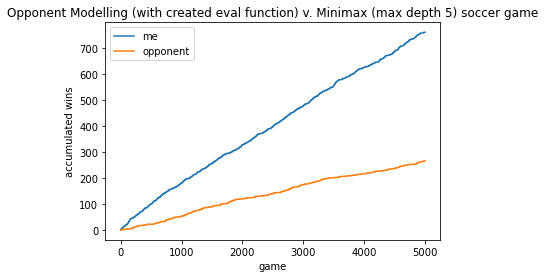

In [11]:
sns.lineplot(x=df2_accum.index, y=df2_accum['accumulated_sum'])
sns.lineplot(x=df2_accum.index, y=df2_accum['accumulated_sum_opp'])

plt.legend(['me','opponent'])

plt.title('Opponent Modelling (with created eval function) v. Minimax (max depth 5) soccer game')
plt.ylabel('accumulated wins')
plt.xlabel('game')

Text(0.5, 0, 'game')

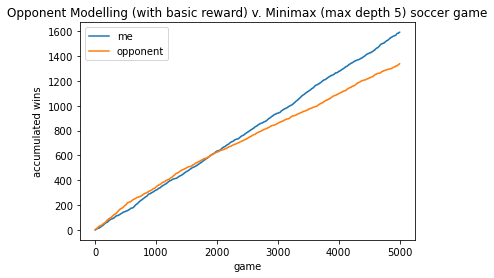

In [12]:
sns.lineplot(x=df3_accum.index, y=df3_accum['accumulated_sum'])
sns.lineplot(x=df3_accum.index, y=df3_accum['accumulated_sum_opp'])

plt.legend(['me','opponent'])

plt.title('Opponent Modelling (with basireward) v. Minimax (max depth 5) soccer game')
plt.ylabel('accumulated wins')
plt.xlabel('game')

Text(0.5, 0, 'game')

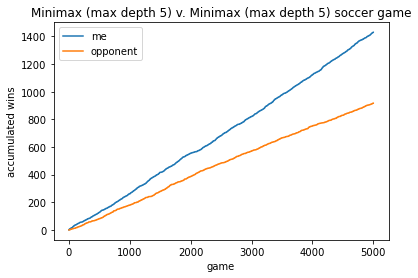

In [13]:
sns.lineplot(x=df4_accum.index, y=df4_accum['accumulated_sum'])
sns.lineplot(x=df4_accum.index, y=df4_accum['accumulated_sum_opp'])

plt.legend(['me','opponent'])

plt.title('Minimax (max depth 5) v. Minimax (max depth 5) soccer game')
plt.ylabel('accumulated wins')
plt.xlabel('game')

In [38]:
avg_om_evalre = (df2_wins['my wins '].sum() + df_wins['my wins '].sum())/2

print(avg_om_evalre/5000*100)

13.96


In [47]:
df3_wins['my wins '].sum()/5000*100

30.64